In [1]:
#!/usr/bin/env python

# Copyright (C) 2024 Susanna M. Green and Andrew P. Lundgren 

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 25})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
#Define directory of the input and output files 
DATA_DIR = '/users/sgreen/gwtuna/paper/outputfiles/'

In [4]:
#Key Results
GWtuna_popsize50 = DATA_DIR+r'GWtunaLambdaEtaO4TPESampler1000CmaEsampler9000LR50ipopincpopsize2Callback500FinalRecoveredSNR.csv'
GWtuna_popsize50 = pd.read_csv(GWtuna_popsize50)

GWtuna_popsize50_failed = DATA_DIR+r'GWtunaLambdaEtaO4TPESampler1000CmaEsampler9000LR50ipopincpopsize2Callback500FinalFailed.csv'
GWtuna_popsize50_failed = pd.read_csv(GWtuna_popsize50_failed)

#Bi-population
GWtuna_bipop = DATA_DIR+r'GWtunaLambdaEtaO4TPESampler1000CmaEsampler9000LR50bipopincpopsize2Callback500FinalRecoveredSNR.csv'
GWtuna_bipop = pd.read_csv(GWtuna_bipop)

GWtuna_bipop_failed = DATA_DIR+r'GWtunaLambdaEtaO4TPESampler1000CmaEsampler9000LR50bipopincpopsize2Callback500FinalFailed.csv'
GWtuna_bipop_failed = pd.read_csv(GWtuna_bipop_failed)

#Learning Rate Data
GWtuna_popsize50_noLR = DATA_DIR+r'GWtunaLambdaEtaO4TPESampler1000CmaEsampler900050ipopincpopsize2Callback500FinalRecoveredSNR.csv'
GWtuna_popsize50_noLR = pd.read_csv(GWtuna_popsize50_noLR)

GWtuna_popsize50_noLR_failed = DATA_DIR+r'GWtunaLambdaEtaO4TPESampler1000CmaEsampler900050ipopincpopsize2Callback500FinalFailed.csv'
GWtuna_popsize50_noLR_failed = pd.read_csv(GWtuna_popsize50_noLR_failed)

#Mass and Spin Data
GWtuna_popsize50_mass = DATA_DIR+r'GWtunaMassSpinO4TPESampler1000CmaEsampler9000LR50ipopincpopsize2Callback500FinalRecoveredSNR.csv'
GWtuna_popsize50_mass = pd.read_csv(GWtuna_popsize50_mass)

GWtuna_popsize50_mass_failed = DATA_DIR+r'GWtunaMassSpinO4TPESampler1000CmaEsampler9000LR50ipopincpopsize2Callback500FinalFailed.csv'
GWtuna_popsize50_mass_failed = pd.read_csv(GWtuna_popsize50_mass_failed)

#Mchirp, Eta and Spin Data
GWtuna_popsize50_mchirp = DATA_DIR+r'GWtunaMchirpEtaO4TPESampler1000CmaEsampler9000LR50ipopincpopsize2Callback500FinalRecoveredSNR.csv'
GWtuna_popsize50_mchirp = pd.read_csv(GWtuna_popsize50_mchirp)

GWtuna_popsize50_mchirp_failed = DATA_DIR+r'GWtunaMchirpEtaO4TPESampler1000CmaEsampler9000LR50ipopincpopsize2Callback500FinalFailed.csv'
GWtuna_popsize50_mchirp_failed = pd.read_csv(GWtuna_popsize50_mchirp_failed)

In [5]:
GWtuna_popsize50.head()

,lambda0,eta,chi1,chi2,snr,predicted_lambda0,predicted_eta,predicted_spin1,predicted_spin2,predicted_snr,TPE,CMAES
0,0.485684,0.244796,0.035025,-0.044060,6.689128,0.867840,0.240231,-0.040665,0.011001,6.526603,11.212319,47.516114
1,0.704871,0.231814,-0.003162,-0.027729,6.907157,0.704531,0.226911,0.015034,0.005457,6.951857,2.535474,48.593110
2,0.790858,0.229220,0.033349,0.048313,8.328521,0.791195,0.237670,-0.015797,0.009156,7.918261,4.652483,48.307516
3,0.847556,0.230635,0.041323,-0.026049,13.905163,0.847729,0.234929,0.011206,-0.003522,13.696639,0.165700,48.567377
4,0.802078,0.237987,-0.028824,-0.040012,13.456867,0.802140,0.236519,-0.038930,-0.019119,13.432536,1.295185,47.778798


In [25]:
error_popsize50 = GWtuna_popsize50['snr'] - GWtuna_popsize50['predicted_snr']
fraction_snr_popsize50 = GWtuna_popsize50['predicted_snr']/GWtuna_popsize50['snr']

print(f'The mean fraction of SNR is {np.sum(fraction_snr_popsize50)/len(fraction_snr_popsize50)}. ')
print(f'The mean fraction of SNR cubed is {np.sum(fraction_snr_popsize50**3)/len(fraction_snr_popsize50)}. ')

The mean fraction of SNR is 1.0040422123653288. 
The mean fraction of SNR cubed is 1.039280094589332. 


In [31]:
SNR_dataframe = pd.DataFrame(np.vstack((GWtuna_popsize50['snr'], GWtuna_popsize50['predicted_snr'], fraction_snr_popsize50)).T, columns=['snr', 'predicted_snr', 'fraction_snr'])
SNR_dataframe.to_csv('SNR.csv')

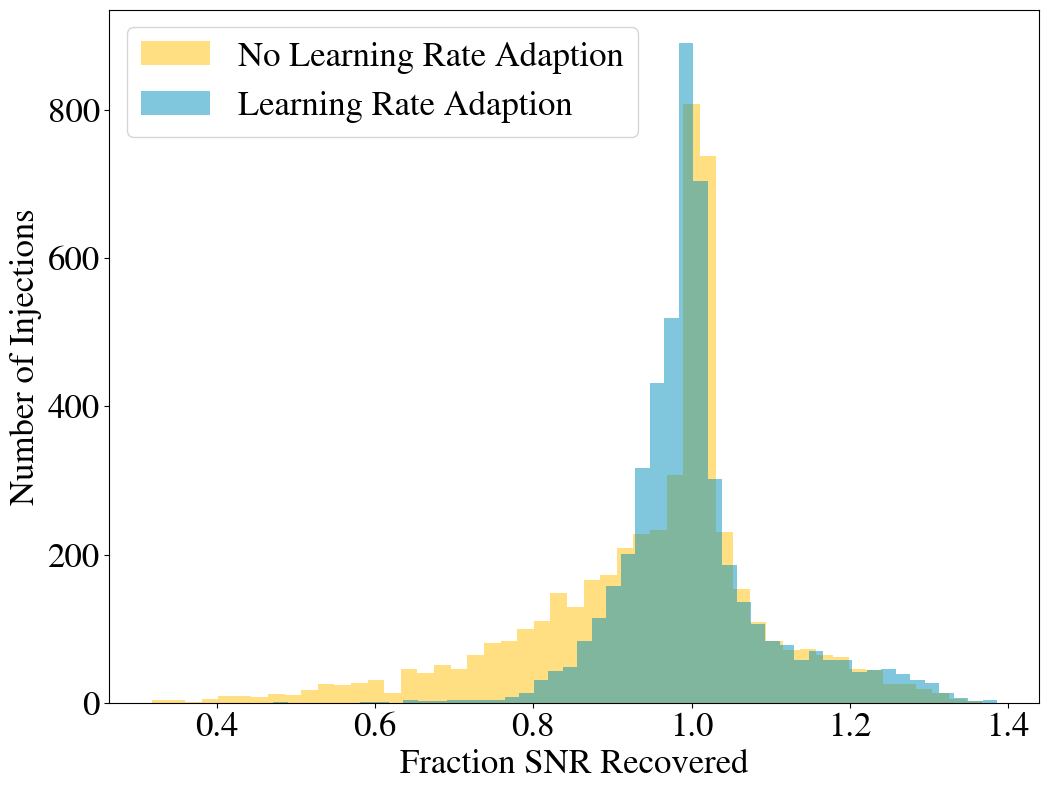

In [6]:
GWtuna_popsize50_noLR_error = GWtuna_popsize50_noLR['snr'] - GWtuna_popsize50_noLR['predicted_snr']
fraction_snr_popsize50_noLR = GWtuna_popsize50_noLR['predicted_snr']/GWtuna_popsize50_noLR['snr']

plt.figure(figsize=(12, 9))
plt.hist(fraction_snr_popsize50_noLR, bins=50, alpha=0.5, color='#FFC107', label='No Learning Rate Adaption')
plt.hist(fraction_snr_popsize50, bins=50, alpha=0.5, color='#038fba', label='Learning Rate Adaption')
plt.ylabel('Number of Injections')
plt.xlabel('Fraction SNR Recovered')
plt.legend()
plt.savefig('Final_LearningRate.png', dpi=300, bbox_inches='tight')

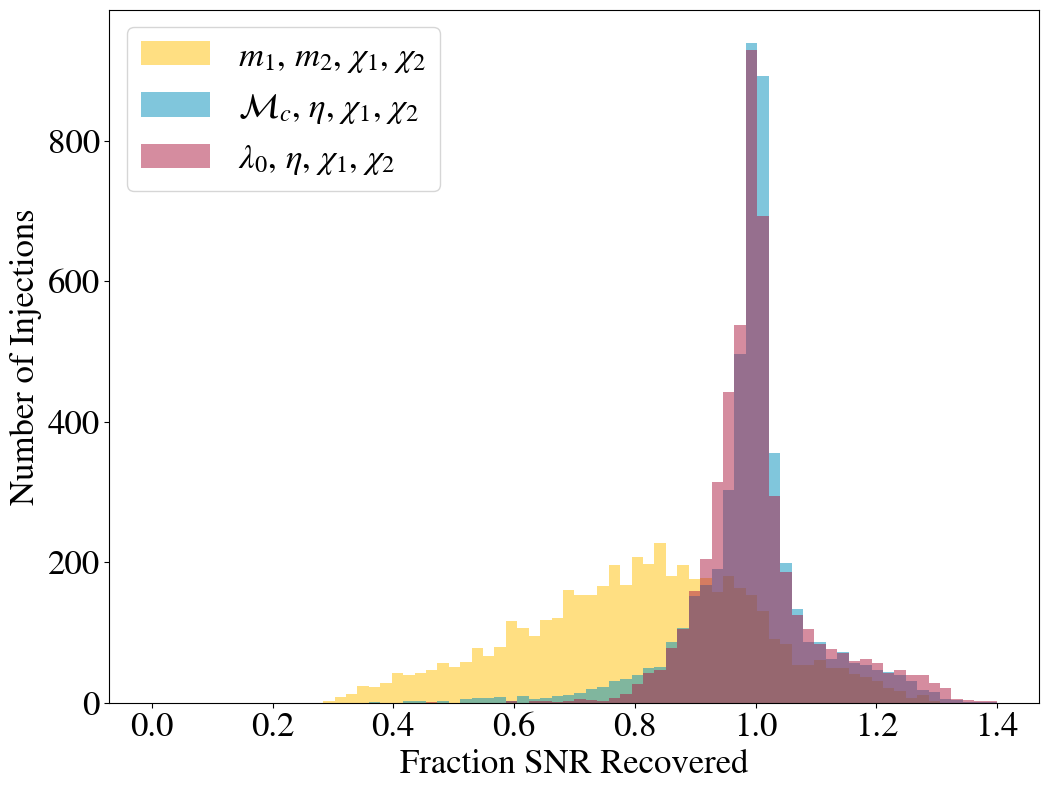

In [7]:
GWtuna_popsize50_mass_error = GWtuna_popsize50_mass['snr'] - GWtuna_popsize50_mass['predicted_snr']
fraction_snr_popsize50_mass = GWtuna_popsize50_mass['predicted_snr']/GWtuna_popsize50_mass['snr']

GWtuna_popsize50_mchirp_error = GWtuna_popsize50_mchirp['snr'] - GWtuna_popsize50_mchirp['predicted_snr']
fraction_snr_popsize50_mchirp = GWtuna_popsize50_mchirp['predicted_snr']/GWtuna_popsize50_mchirp['snr']

plt.figure(figsize=(12, 9))
bin_nom = np.linspace(0, 1.4, 75)
plt.hist(fraction_snr_popsize50_mass, bins=bin_nom, alpha=0.5, color='#FFC107', label='$m_{1}$, $m_{2}$, $\chi_{1}$, $\chi_{2}$')
plt.hist(fraction_snr_popsize50_mchirp, bins=bin_nom, alpha=0.5, color='#038fba', label='$\mathcal{M}_{c}$, $\eta$, $\chi_{1}$, $\chi_{2}$')
plt.hist(fraction_snr_popsize50, bins=bin_nom, alpha=0.5, color='#AD1A41', label='$\lambda_{0}$, $\eta$, $\chi_{1}$, $\chi_{2}$')
plt.ylabel('Number of Injections')
plt.xlabel('Fraction SNR Recovered')
plt.legend()
plt.savefig('Final_Mass_MChirp_Lambda0.png', dpi=300, bbox_inches='tight')

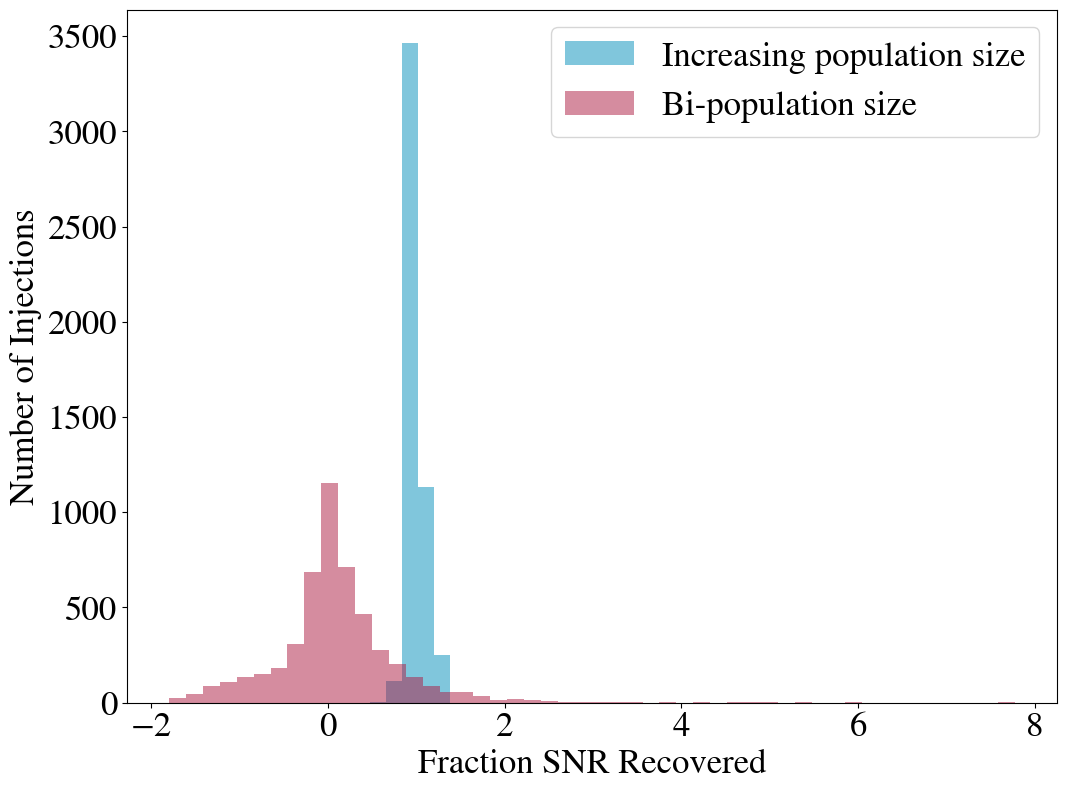

In [8]:
GWtuna_GWtuna_bipop = GWtuna_bipop['snr'] - GWtuna_bipop['predicted_snr']
fraction_snr_GWtuna_bipopp = GWtuna_bipop['predicted_snr']/GWtuna_bipop['snr']

plt.figure(figsize=(12, 9))
plt.hist(fraction_snr_popsize50, bins=5, alpha=0.5, color='#038fba', label='Increasing population size')
plt.hist(GWtuna_GWtuna_bipop, bins=50, alpha=0.5, color='#AD1A41', label='Bi-population size')
plt.ylabel('Number of Injections')
plt.xlabel('Fraction SNR Recovered')
plt.legend()
plt.savefig('Final_Bipop.png', dpi=300, bbox_inches='tight')

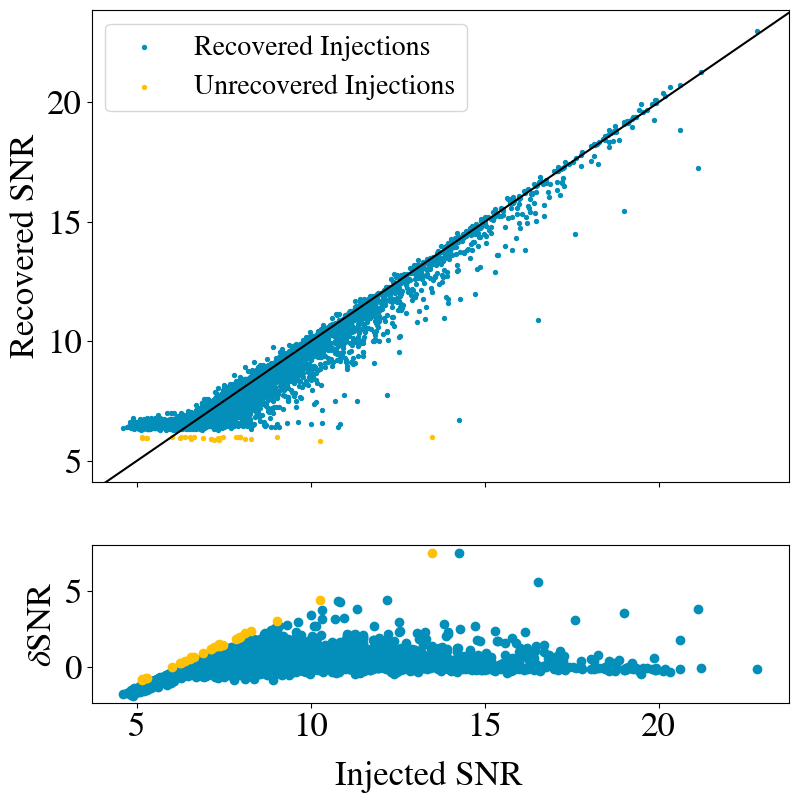

In [9]:
error_popsize50_failed_error = GWtuna_popsize50_failed['snr'] - GWtuna_popsize50_failed['predicted_snr']

fig, (ax1, ax2) = plt.subplots(2, figsize=(9, 9), sharex=True, height_ratios=[3, 1])
ax1.scatter(GWtuna_popsize50['snr'], GWtuna_popsize50['predicted_snr'], s=8, color='#038fba', label='Recovered Injections')
ax1.scatter(GWtuna_popsize50_failed['snr'], GWtuna_popsize50_failed['predicted_snr'], s=8, color='#FFC107', label='Unrecovered Injections')
ax1.axline((5, 5), slope=1, color='k')
ax1.set_ylabel('Recovered SNR')
ax1.legend(loc='upper left', fontsize=20)

ax2.scatter(GWtuna_popsize50['snr'], error_popsize50, color = '#038fba')
ax2.scatter(GWtuna_popsize50_failed['snr'], error_popsize50_failed_error, color = '#FFC107')
ax2.set_ylabel('$\delta$SNR')

fig.supxlabel('Injected SNR', fontsize=25)
plt.savefig('Final_Injected_recovered_SNR.png', dpi=300, bbox_inches='tight')

In [10]:
print(f'TPE failed to recover {len(GWtuna_popsize50_failed)} injections, with values:')
print(np.array(GWtuna_popsize50_failed['snr'].values))

TPE failed to recover 28 injections, with values:
[13.4859605   5.15398381  7.90802299  7.39730334 10.25853588  9.03950194
  8.12627334  6.01556525  7.97945412  7.49224529  6.23571989  5.14839377
  7.12845112  7.14699288  8.29161659  6.90669949  7.38123073  6.52482495
  6.5748104   7.34480853  6.26731939  6.65722771  6.39902021  5.27571659
  7.21822777  7.84796485  7.97378741  5.29021379]


In [35]:
GWtuna_popsize50_failed_greater_SNR_10 = GWtuna_popsize50_failed['snr'] > 10
print(GWtuna_popsize50_failed['lambda0'][GWtuna_popsize50_failed_greater_SNR_10])
print(GWtuna_popsize50_failed['eta'][GWtuna_popsize50_failed_greater_SNR_10])
print(GWtuna_popsize50_failed['chi1'][GWtuna_popsize50_failed_greater_SNR_10])
print(GWtuna_popsize50_failed['chi2'][GWtuna_popsize50_failed_greater_SNR_10])

0    0.381987
4    0.656667
Name: lambda0, dtype: float64
0    0.234194
4    0.223267
Name: eta, dtype: float64
0    0.002201
4    0.039723
Name: chi1, dtype: float64
0   -0.004917
4    0.023091
Name: chi2, dtype: float64


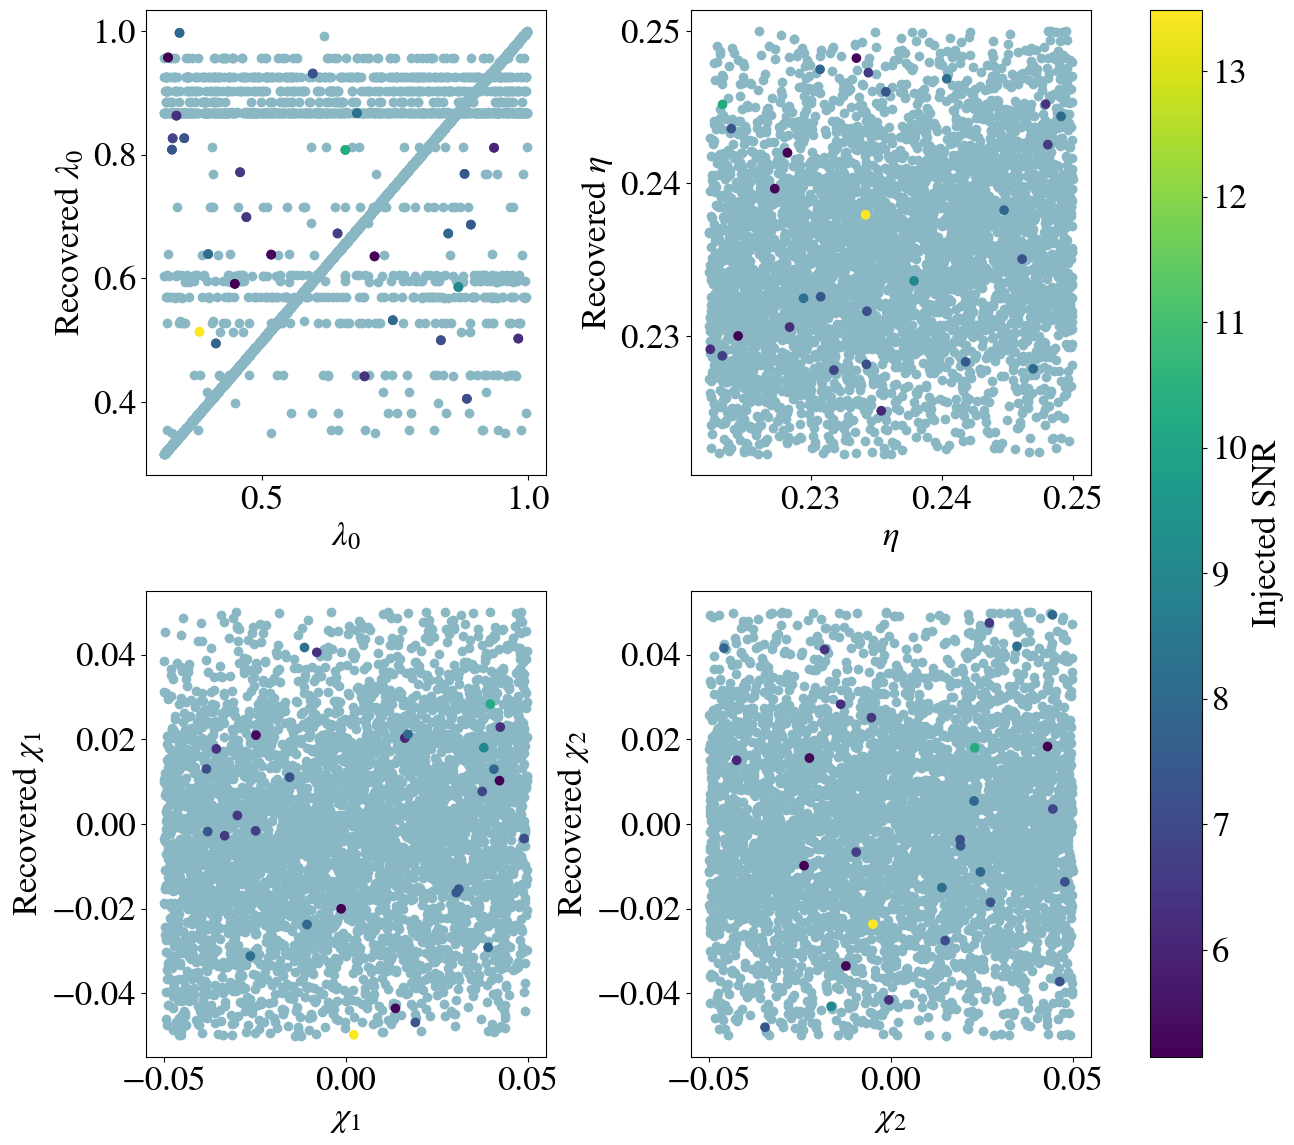

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

ax1.scatter(GWtuna_popsize50_failed['lambda0'], GWtuna_popsize50_failed['predicted_lambda0'], c=GWtuna_popsize50_failed['snr'].values, zorder=30)
ax1.scatter(GWtuna_popsize50['lambda0'], GWtuna_popsize50['predicted_lambda0'], color='#89b8c4')
ax1.set_xlabel('$\lambda_{0}$')
ax1.set_ylabel('Recovered $\lambda_{0}$')

#plt.subplot(2, 2, 2)
ax2.scatter(GWtuna_popsize50_failed['eta'], GWtuna_popsize50_failed['predicted_eta'], c=GWtuna_popsize50_failed['snr'].values, zorder=30)
ax2.scatter(GWtuna_popsize50['eta'],  GWtuna_popsize50['predicted_eta'], color='#89b8c4')
ax2.set_xlabel('$\eta$')
ax2.set_ylabel('Recovered $\eta$')

#plt.subplot(2, 2, 3)
ax3.scatter(GWtuna_popsize50_failed['chi1'], GWtuna_popsize50_failed['predicted_spin1'], c=GWtuna_popsize50_failed['snr'].values, zorder=30)
ax3.scatter(GWtuna_popsize50['chi1'], GWtuna_popsize50['predicted_spin1'], color='#89b8c4')
ax3.set_xlabel('$\chi_{1}$')
ax3.set_ylabel('Recovered $\chi_{1}$')

#plt.subplot(2, 2, 4)
ax4.scatter(GWtuna_popsize50_failed['chi2'], GWtuna_popsize50_failed['predicted_spin2'], c=GWtuna_popsize50_failed['snr'].values, zorder=30)
ax4.scatter(GWtuna_popsize50['chi2'],  GWtuna_popsize50['predicted_spin2'], color='#89b8c4')
ax4.set_xlabel('$\chi_{2}$')
ax4.set_ylabel('Recovered $\chi_{2}$')

fig.tight_layout() 
fig.colorbar(ax1.scatter(GWtuna_popsize50_failed['lambda0'], GWtuna_popsize50_failed['predicted_lambda0'], 
                         c=GWtuna_popsize50_failed['snr'].values, 
                         zorder=30, vmin=min(GWtuna_popsize50_failed['snr'].values), 
                         vmax=max(GWtuna_popsize50_failed['snr'].values)), ax=[ax1,ax2,ax3,ax4], label='Injected SNR')
fig.savefig('Final_param_error.png', dpi=300, bbox_inches='tight')

In [12]:
print(f'The median time taken for TPE')
print(np.median(GWtuna_popsize50['TPE']))

The median time taken for TPE
1.032862663269043


In [13]:
print(f'The median time taken for CMA-ES')
print(np.median(GWtuna_popsize50['CMAES']))

The median time taken for CMA-ES
48.20419001579285


In [14]:
GWtuna_popsize50_reduced_snr = GWtuna_popsize50['snr'][GWtuna_popsize50['snr'] > 8]
GWtuna_popsize50_reduced_predicted_snr = GWtuna_popsize50['predicted_snr'][GWtuna_popsize50['snr'] > 8]

fraction_snr_popsize50_reduced = GWtuna_popsize50_reduced_predicted_snr/GWtuna_popsize50_reduced_snr

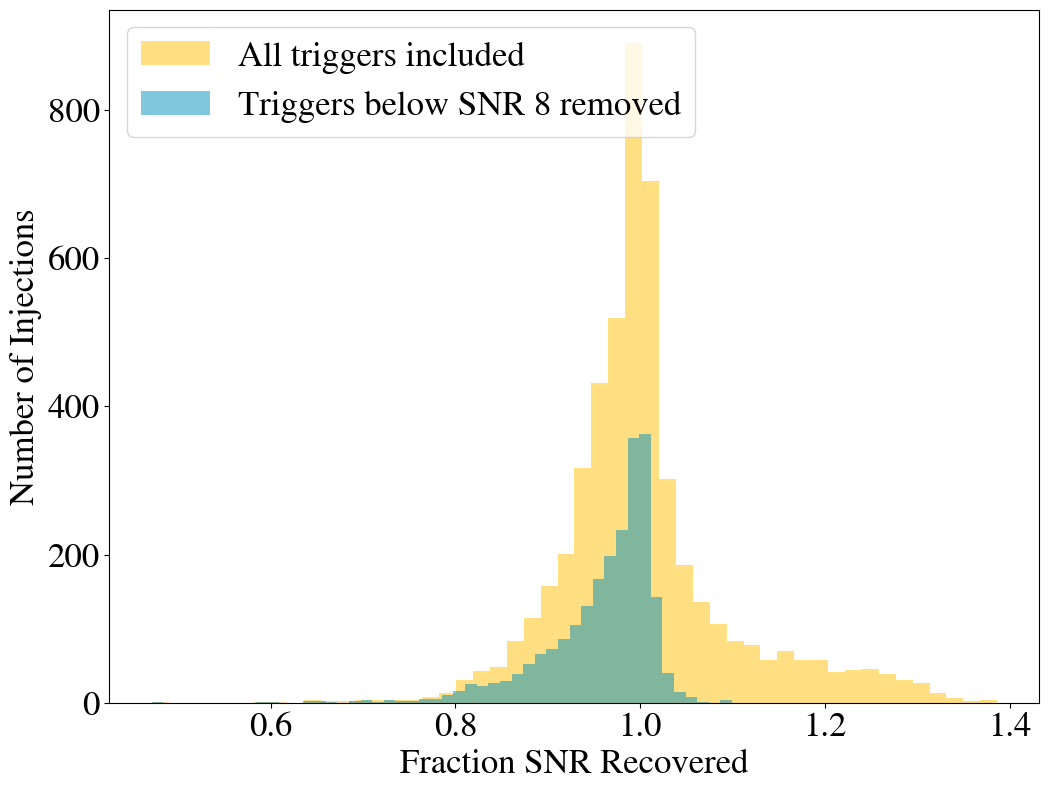

In [15]:
plt.figure(figsize=(12, 9))
plt.hist(fraction_snr_popsize50, bins=50, alpha=0.5, color='#FFC107', label='All triggers included')
plt.hist(fraction_snr_popsize50_reduced, bins=50, alpha=0.5, color='#038fba', label='Triggers below SNR 8 removed')
plt.ylabel('Number of Injections')
plt.xlabel('Fraction SNR Recovered')
plt.legend(loc='upper left')
plt.savefig('Final_Threshold_Investigation.png', dpi=300, bbox_inches='tight')

In [26]:
print(f'The mean fraction of reduced SNR is {np.sum(fraction_snr_popsize50_reduced)/len(fraction_snr_popsize50_reduced)}. ')
print(f'The mean fraction of reduced SNR cubed is {np.sum(fraction_snr_popsize50_reduced**3)/len(fraction_snr_popsize50_reduced)}. ')

The mean fraction of reduced SNR is 0.9581293592590209. 
The mean fraction of reduced SNR cubed is 0.8895044335539362. 


In [27]:
len(fraction_snr_popsize50_reduced)

2239

In [38]:
from pycbc.conversions import eta_from_mass1_mass2, mchirp_from_mass1_mass2

print(eta_from_mass1_mass2(1, 3))
print(eta_from_mass1_mass2(1, 1))
print(eta_from_mass1_mass2(3, 3))
print(mchirp_from_mass1_mass2(1, 3))
print(mchirp_from_mass1_mass2(1, 1))
print(mchirp_from_mass1_mass2(3, 3))

0.1875
0.25
0.25
1.4650780257917608
0.8705505632961241
2.6116516898883724
